In [1]:
#file name: tourism.ipynb
#author: Solange  
#Objective: To predict which customer is more likely to purchase the newly introduced travel package.
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBRegressor #<-this requires library install

In [ ]:
# Two sample t-test for comparing mean

import scipy.stats as st
#Lets define some useful stats quantities for analysis
def ssdev(X):
    xbar = np.mean(X)
    s= sum([(x-xbar)**2 for x in X])
    ssd =( s / (len(X)-1) )**.5
    return ssd
def tstat(xb1, xb2, ss1, ss2, n1, n2):
    #this is a rough estimator and not using pooled t-test
    print("tstat: xb1, xb2, ss1, ss2, n1, n2 ")
    print(str([xb1, xb2, ss1, ss2, n1, n2]) )
    SE = (ss1**2/n1 + ss2**2/n2)**.5
    ts = (xb1 - xb2)/SE
    return ts
def twos_twotail_ttest(Samp1, Samp2, sig):
    x_bar_1 = np.mean(Samp1)
    x_bar_2 = np.mean(Samp2)
    ssdev_1 = ssdev(Samp1)
    ssdev_2 = ssdev(Samp2)
#the degrees of freedom is the smaller of the two n1-1 and n2-1
    df_12 = min(len(Samp1), len(Samp2)) -1
    #print the critical values designating the ending and beginning of rejection region
    print(st.t.interval(alpha=(1-sig), df=df_12, loc=0, scale=1) )
#lastly, calculate the t-stsat
    t_AGE = tstat(x_bar_1, x_bar_2, ssdev_1, ssdev_2, len(Samp1), len(Samp2))
    print(t_AGE)

In [2]:
#Specify and open/read the raw data file to DataFrame
tourism_data_file_reference = "tourism.csv"
tourism_data = pd.read_csv(tourism_data_file_reference)

In [3]:
#Checking that the import was successful and previewing which data need to be cleaned
tourism_data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [4]:
tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
tourism_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
#The ProdTaken column is the one we are trying to predict using the binary classifier models 
# Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, 
# NumberOfChildrenVisiting, MonthlyIncome
#Dropping two columns from the dataframe

#Firstly, customer id is an unhelpful index (not helpful for prediction)
tourism_data.drop(columns=['CustomerID'], inplace=True)

In [7]:
#Pull all columns excetp the response 
tourism_cols = tourism_data.columns.tolist()
tourism_cols.remove('ProdTaken')
print(tourism_cols)

['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


In [8]:
#remove the ones that are nan
copy_tourism_data = tourism_data.dropna()

In [9]:
#Divide using train test split
y = copy_tourism_data["ProdTaken"]
X = copy_tourism_data[tourism_cols]#independent variables
X_train, X_val, y_train, y_val= train_test_split(X, y,random_state = 0)

In [10]:
# Get list of categorical variables
#https://www.kaggle.com/alexisbcook/categorical-variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [11]:
#Next Use One-Hot encoder to turn categorical columns into encoded values

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

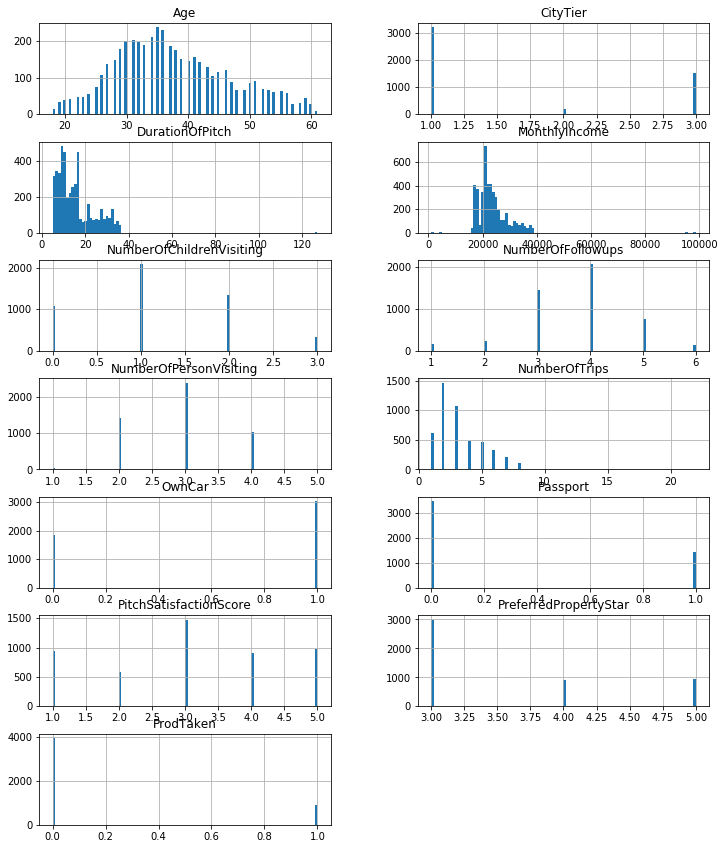

In [12]:
#Visualize the distributions of all data
tourism_data.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [13]:
#Looking For Correlations to See what might be useful to test
# However we want to see correlation in graphical representation so below is function for that
import numpy as np
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

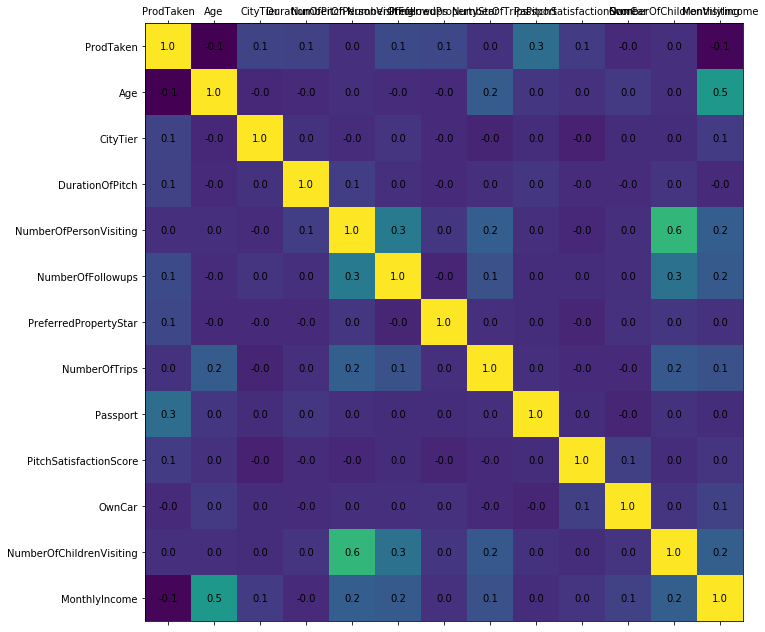

In [14]:
plot_corr(tourism_data)

In [32]:
#Using Appended concatinated set for the analyses
y_train.append(y_val)
OH_X_train.append(OH_X_valid)
clean_toursim_data = pd.concat([y_train,OH_X_train], axis=1)

In [33]:
#__________DATA CLEANED, SPLIT BY RESPONSE
df_prodtaken_y, df_prodtaken_n = [x for _, x in clean_toursim_data.groupby(tourism_data['ProdTaken'] == 0)]

In [34]:
df_prodtaken_y.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,13,14,15,16,17,18,19,20,21,22
count,588.0,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,...,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,1.0,34.421769,1.821429,17.232993,2.945578,3.950680,3.756803,3.353741,0.552721,3.244898,...,0.018707,0.130952,0.348639,0.316327,0.204082,0.018707,0.602041,0.212585,0.153061,0.013605
std,0.0,9.953504,0.959353,8.510048,0.705610,0.981576,0.860077,2.011221,0.497636,1.323831,...,0.135605,0.337635,0.476945,0.465438,0.403372,0.135605,0.489894,0.409485,0.360353,0.115945
min,1.0,18.000000,1.000000,6.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,28.000000,1.000000,10.000000,2.000000,3.000000,3.000000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,33.000000,1.000000,15.000000,3.000000,4.000000,3.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.0,40.250000,3.000000,24.000000,3.000000,5.000000,5.000000,5.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,59.000000,3.000000,36.000000,4.000000,6.000000,5.000000,19.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


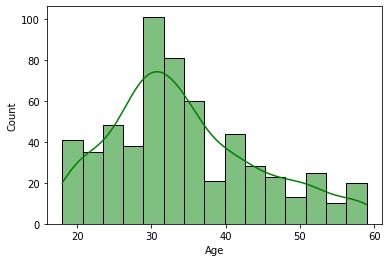

In [35]:
#Age
sns.histplot(df_prodtaken_y['Age'], kde=True, color='green')

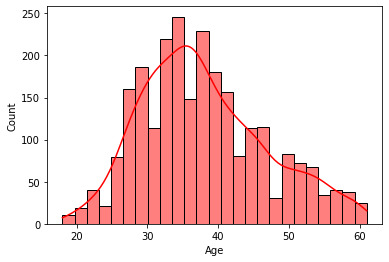

In [36]:
sns.histplot(df_prodtaken_n['Age'], kde=True, color='red')

In [40]:
#Ages can be assumed to be roughly normal and independent of one another
#H0 : mean zipcode is the same between historical loan status 
#H1 : mean zipcode is different between historical loan status
# significance = .05
twos_twotail_ttest(df_prodtaken_n['Age'], df_prodtaken_y['Age'], .05)

(-1.9640135365006253, 1.9640135365006253)
tstat: xb1, xb2, ss1, ss2, n1, n2 
[37.96610845295056, 34.42176870748299, 8.823178110289668, 9.953503604476895, 2508, 588]
7.934708318417879


In [ ]:
#7 is outside the range therefore the means are statistically different